# BEE 4750 Lab 2: Uncertainty and Monte Carlo

**Name**: Lesedi Kgatla

**ID**: lk535

> **Due Date**
>
> Friday, 9/22/23, 9:00pm

## Setup

The following code should go at the top of most Julia scripts; it will
load the local package environment and install any needed packages. You
will see this often and shouldn’t need to touch it.

In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `c:\Users\lk535\Desktop\Classes\BEE 4750\Lab 2_copy\lab-02-LesediK01`

In [1]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting

## Introduction

In this lab, you will use Monte Carlo analysis to estimate the expected
winnings for a couple of different games of chance.

Monte Carlo methods involve the simulation of random numbers from
probability distributions. In an environmental context, we often
propagate these random numbers through some more complicated model and
then compute a resulting statistic which is relevant for assessing
performance or risk, such as an average outcome or a particular
quantile.

Julia provides a common interface for probability distributions with the
[`Distributions.jl`
package](https://juliastats.org/Distributions.jl/stable/). The basic
workflow for sampling from a distribution is:

1.  Set up the distribution. The specific syntax depends on the
    distribution and what parameters are required, but the general call
    is the similar. For a normal distribution or a uniform distribution,
    the syntax is

    ``` julia
    # you don't have to name this "normal_distribution"
    # μ is the mean and σ is the standard deviation
    normal_distribution = Normal(μ, σ)
    # a is the upper bound and b is the lower bound; these can be set to +Inf or -Inf for an unbounded distribution in one or both directions.
    uniform_distribution = Uniform(a, b)
    ```

    There are lots of both
    [univariate](https://juliastats.org/Distributions.jl/stable/univariate/#Index)
    and
    [multivariate](https://juliastats.org/Distributions.jl/stable/multivariate/)
    distributions, as well as the ability to create your own, but we
    won’t do anything too exotic here.

2.  Draw samples. This uses the `rand()` command (which, when used
    without a distribution, just samples uniformly from the interval
    $[0, 1]$.) For example, to sample from our normal distribution
    above:

    ``` julia
    # draw n samples
    rand(normal_distribution, n)
    ```

Putting this together, let’s say that we wanted to simulate 100
six-sided dice rolls. We could use a [Discrete Uniform
distribution](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.DiscreteUniform).

In [3]:
dice_dist = DiscreteUniform(1, 6) # can generate any integer between 1 and 6
dice_rolls = rand(dice_dist, 100) # simulate rolls

100-element Vector{Int64}:
 4
 6
 3
 6
 1
 5
 3
 4
 3
 1
 1
 1
 1
 ⋮
 1
 5
 4
 2
 4
 3
 4
 4
 2
 3
 6
 3

And then we can plot a histogram of these rolls:


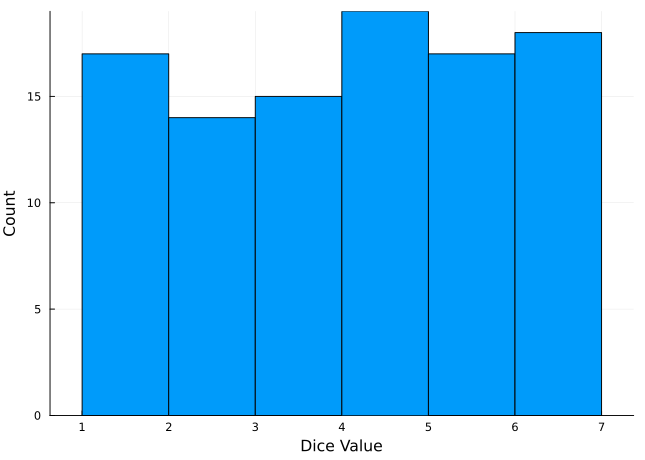

In [4]:
histogram(dice_rolls, legend=:false, bins=6)
ylabel!("Count")
xlabel!("Dice Value")

**Remember to**:

-   Evaluate all of your code cells, in order (using a `Run All`
    command). This will make sure all output is visible and that the
    code cells were evaluated in the correct order.
-   Tag each of the problems when you submit to Gradescope; a 10%
    penalty will be deducted if this is not done.

## Exercises (10 points)

In Problem 1, you will compute the probability of getting a specific
combination of multiple dice rolls. The focus will be on understanding
how the Monte Carlo estimate changes based on the number of simulations.

In Problem 2, we will implement the culmination of every episode of the
long-running game show [The Price Is
Right](https://en.wikipedia.org/wiki/The_Price_Is_Right): the
[Showcase](https://en.wikipedia.org/wiki/The_Price_Is_Right#Showcase).
You will be asked to make a plot of expected winnings by bid for a
particular distribution of prize values.

You should always start any computing with random numbers by setting a
“seed,” which controls the sequence of numbers which are generated
(since these are not *really* random, just “pseudorandom”). In Julia, we
do this with the `Random.seed!()` function.

``` julia
Random.seed!(1)
```

    TaskLocalRNG()

It doesn’t matter what seed you set, though different seeds might result
in slightly different values. But setting a seed means every time your
notebook is run, the answer will be the same.

> **Seeds and Reproducing Solutions**
>
> If you don’t re-run your code in the same order or if you re-run the
> same cell repeatedly, you will not get the same solution. If you’re
> working on a specific problem, you might want to re-use
> `Random.seed()` near any block of code you want to re-evaluate
> repeatedly.

### Problem 1 (5 points)

We want to know the probability of getting at least an 11 from rolling
three fair, six-sided dice (this is actually an old Italian game called
*passadieci*, which was analyzed by Galileo as one of the first examples
of a rigorous study of probability).

#### Problem 1.1 (1 point)

Write a function called `passadieci()` to simulate this game, which will
take as an input the number of realizations and output a vector of the
sum of the three dice rolls for each realization.

In [2]:
Random.seed!(1) #setting the seed to ensure that the sequence of random numbers will be the same with each run

function passadieci1()  #define the function
    dice_dist = DiscreteUniform(1, 6) # can generate any integer between 1 and 6
    rolls = rand(dice_dist,3)  # simulate the roll for three dices
    sum_rolls = sum(rolls) 
    return sum_rolls >= 11
end


passadieci1 (generic function with 1 method)

### Problem 1.2 (2 points)

Generate 5,000 simulations of the game using your `passadieci()`
function. Plot how the computed probability of winning the game changes
as the number of simulations increases (you can do this by computing the
frequency of wins for each additional simulation).

In [3]:
simulations = 5000 #5000 simulations of passadieci
roll_results = [] #initialize an empty array
for i in 1: simulations
    push!(roll_results, passadieci1())
end

wins = cumsum(roll_results) #determine the cumulative sum of roll results that satisfy the function
probability = wins ./ (1:simulations) #determine the probability of wins using element-wise operator


5000-element Vector{Float64}:
 0.0
 0.5
 0.6666666666666666
 0.5
 0.4
 0.3333333333333333
 0.2857142857142857
 0.375
 0.4444444444444444
 0.5
 ⋮
 0.49919871794871795
 0.49909873823352696
 0.49919903884661593
 0.4992992992992993
 0.4991993594875901
 0.4990994596758055
 0.49899959983993597
 0.4990998199639928
 0.499

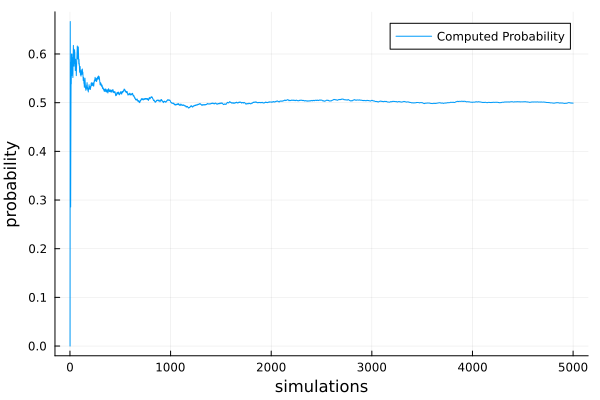

In [11]:
X = [1:5000]
plot(X, probability, xlabel = "simulations", ylabel = "probability", label = "Computed Probability") #plot the cumulative probability


### Problem 1.3 (2 point)

Based on your plot from Problem 1.2, how many simulations were needed
for the win probability estimate to converge? What did you notice from
your plot about the estimates prior to convergence?

The number of simulations needed for the win probability to converge is approximated at 1200. Prior to convergence, uncertainty is observed due to the (relative) low number simulations. As the number of simulations increased however, we observed a convergence reflective of a high degree of precision. 

## Problem 2 (5 points)

The Showcase is the final round of every episode of The Price is Right,
matching the two big winners from the episode. Each contestant is shown
a “showcase” of prizes, which are usually some combination of a trip, a
motor vehicle, some furniture, and maybe some other stuff. They then
each have to make a bid on the retail price of the showcase. The rules
are:

-   an overbid is an automatic loss;
-   the contest who gets closest to the retail price wins their
    showcase;
-   if a contestant gets within \$250 of the retail price and is closer
    than their opponent, they win both showcases.

Your goal is to find a wager which maximizes your expected winnings,
which we may as well call utility, based on your assessment of the
probability of your showcase retail price. We’ll assume that the
distribution of all showcases offered by the show is given as truncated
normal distribution, which means a normal distribution which has an
upper and/or lower bound. `Distributions.jl` makes it easy to specify
truncations on any distribution, not just normal distributions. For
example, we’ll use this distribution for the showcase values:

``` julia
showcase_dist = truncated(Normal(31000, 4500), lower=5000, upper=42000)
```

    Truncated(Normal{Float64}(μ=31000.0, σ=4500.0); lower=5000.0, upper=42000.0)

#### Problem 2.1 (3 points)

Write a function `showcase()` which takes in a bid value and uses Monte
Carlo simulation to compute the expected value of the winnings. Make the
following assumptions about your expected winnings if you don’t overbid:

-   If you win both showcases, the value is the double of the single
    showcase value.
-   If you did not win both showcases but bid under the showcase value,
    the probability of being outbid increases linearly as the distance
    between your bid and the value increases (in other words, if you bid
    the exact value, you win with probability 1, and if you bid \$0, you
    win with probability 0).

How did you decide how many samples to use within the function?

In [4]:
function showcase(bid, samples = 200000) #initialise showcase function 
    initial_distribution = Normal(31000,4500)
    showcase_dist = truncated(initial_distribution, 5000, 42000)

    # Monte Carlo simulation
    function simulate_showcase(bid, showcase_dist, samples)
        winnings = 0.0
        lower_bound = showcase_dist.lower
        upper_bound = showcase_dist.upper
        
        for i in 1: samples
            actual_value = rand(showcase_dist) #generate random showcase bid

                function win_both_showcases(bid, actual_value) #modular function based on assumption 1
                    lower_bound = showcase_dist.lower
                    if bid <= lower_bound && actual_value <= lower_bound
                        return 2 * actual_value
                    end
                end

                function win_one_showcase(bid, actual_value) #modular function based on assumption 2
                    lower_bound = showcase_dist.lower
                    if (actual_value <= lower_bound && bid > lower_bound) || (actual_value > lower_bound && bid <= lower_bound)
                        return lower_bound
                    end
                end

            if  bid == actual_value
                winnings += win_both_showcases(bid, actual_value)
            elseif bid < actual_value
                winnings += win_one_showcase(bid, actual_value)
            else 
                # compute probability of winning based on truncated normal distribution from assumption 2 
                prob_win = cdf(showcase_dist, bid + (upper_bound - bid) * rand())
                winnings += prob_win * lower_bound
            end
            
            return winnings
        end
        return winnings / samples #compute expected winnings
    end 
    return simulate_showcase(bid, showcase_dist, samples) #call simulate_showcase function
end


showcase (generic function with 1 method)

The sample size of 200000 was selected based on the principle of the Law of Large Numbers, in that as the number of samples within the simulation increase, the sample mean would approach the true expected value. In tandem, the sample value was not 'too high' (with what is considered as too high being arbitrary) to account for the tradeoff of personal computer capability. 

#### Problem 2.2 (2 points)

Plot the expected winnings for bids ranging from \$0 to \$42,000. What
do you notice?

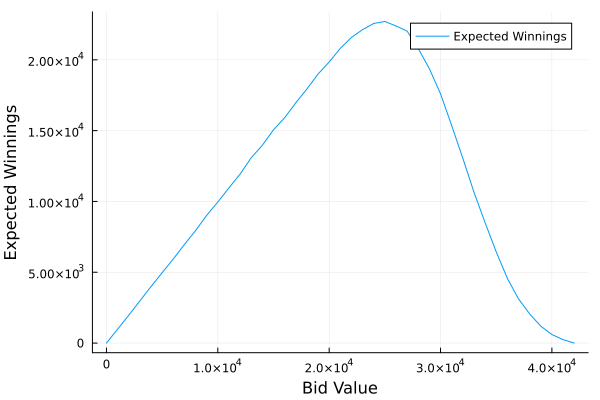

In [5]:
bids = Int[] #initialize empty array to store bids
for i in range(start = 0, stop = 42000, step = 1000)
    push!(bids, i)
end

winnings = [] #initialize array to store winnings
for bid in bids 
    push!(winnings, showcase(bid))
end

plot(bids, winnings, xlabel = "Bid Value", ylabel = "Expected Winnings", label = "Expected Winnings")


In [67]:
#find maximum expected winnings and the corresponding bid
max_winnings = maximum(winnings) #find maximum winnings
max_bidindex = findfirst(isequal(max_winnings), winnings) #find index of the maximum winnings
max_bid = bids[max_bidindex] #find corresponding bid using the index 

println("Maximum expected winning is ", max_winnings, "for a bid of ", max_bid) #compute max winnings and the corresponding bid

Maximum expected winning is 22609.73111002419for a bid of 

25000


The maximum expected winning is obtained at the bid value of $25000, represented by the probability distribution tail. By bidding around the tail, earnings will be maximised. The mean, $31,000 would therefore be an overbid which would result in lower expected earnings.   

## References

Put any consulted sources here, including classmates you worked with/who
helped you.

BEE 5750 Lecture Notes: Why Monte Carlo Works

Educative. n.d. How to perform different vector operations in Julia (online) https://www.educative.io/answers/how-to-perform-different-vector-operations-in-julia (Accessed 18 September 2023).

Educative. n.d. What is the range function in Julia? (online) https://www.educative.io/answers/what-is-the-range-function-in-julia (Accessed 21 September 2023)

Eleftherakou, O. 2022. Playing with Distributions (online) https://blog.devgenius.io/playing-with-distributions-jl-normal-distribution-eb7f1dbd56a3 (Accessed 22 September 2023)

Geeks for Geeks. 2020. Get index of first true value of array in Julia | Array findfirst() Method (online) https://www.geeksforgeeks.org/get-index-of-first-true-value-of-array-in-julia-array-findfirst-method/ (Accessed 18 September 2023)

Julia. n.d. Arrays (online) https://docs.julialang.org/en/v1/base/arrays/#Base.cumsum (Accessed 18 September 2023)

Julia. n.d. Arrays (online) https://docs.julialang.org/en/v1/base/arrays/#Base.findfirst-Tuple%7BFunction,%20Any%7D (Accessed 21 September 2023)

Julia. n.d. Base (online) https://docs.julialang.org/en/v1/base/base/#Base.isequal (Accessed 21 September 2023)

Julia. n.d. Control Flow (online) https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation (Accessed 22 September 2023)

Julia. n.d. Modules (online) https://docs.julialang.org/en/v1/manual/modules/ (Accessed 21 September 2023)

Julia Stats. n.d. Distributions (online) https://juliastats.org/Distributions.jl/stable/truncate/ (Accessed 21 September 2023)

Kwon, C.  2022. Monte Carlo Methods, in Julia Programming for Operations Research, 2nd edn. (online), https://juliabook.chkwon.net/book/montecarlo (accessed 18 September 2023). 

Maas, M.D. 2021. Initializing Arrays and Matrices. (online) https://www.matecdev.com/posts/julia-array-initialize.html#undefined-undef-arrays (Accessed 18 September 2023)

MATLAB. n.d. Cumsum (online) https://www.mathworks.com/help/matlab/ref/cumsum.html (Accessed 18 September 2023)

StackOverflow. 2019.  (online) https://stackoverflow.com/questions/57945372/when-should-i-use-vs-vs-isequal (Accessed 21 September 2023)
